In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('gbm-data.csv')
data_np = data.values
y = data_np[:,0]
X = data_np[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [3]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def f(learn_rate=1):
    clf = GradientBoostingClassifier(n_estimators=250, learning_rate=learn_rate, verbose=False, random_state=241)
    clf.fit(X_train, y_train)

    train_loss = np.zeros(clf.n_estimators)
    for i, y_pred in enumerate(clf.staged_decision_function(X_train)):
        train_loss[i] = log_loss(y_train,sigmoid(y_pred))
    
    test_loss = np.zeros(clf.n_estimators)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        test_loss[i] = log_loss(y_test,sigmoid(y_pred))
        
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    return learn_rate, np.argmin(test_loss)+1, np.min(test_loss)

learn_rate= 1 iteration= 1 val= 0.5822942594278476
learn_rate= 0.5 iteration= 7 val= 0.5582025523164261
learn_rate= 0.3 iteration= 11 val= 0.5423141110024554
learn_rate= 0.2 iteration= 37 val= 0.531094637596885
learn_rate= 0.1 iteration= 52 val= 0.5269201872275844


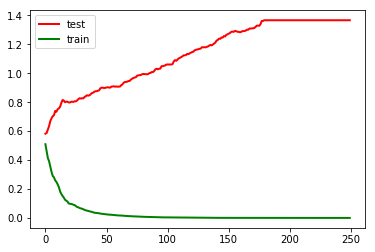

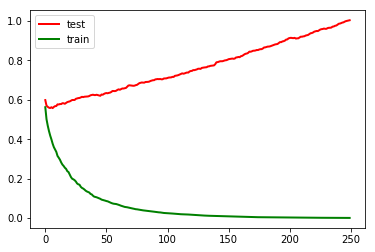

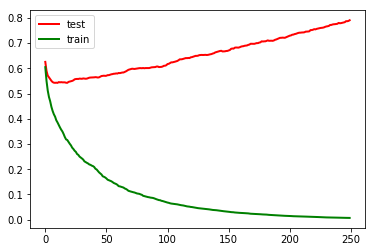

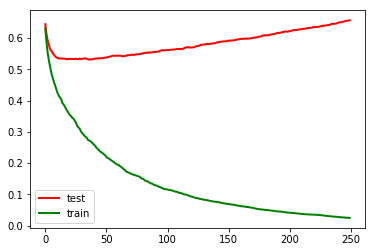

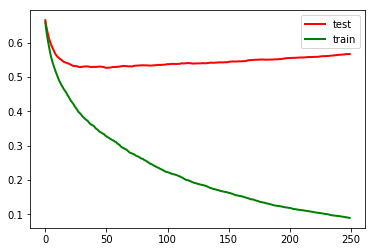

In [4]:
myList = []
for learn_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    myList.append(f(learn_rate))
for l in myList:
    print('learn_rate=', l[0], 'iteration=', l[1], 'val=', l[2])

In [5]:
RFclf = RandomForestClassifier(n_estimators=37, random_state=241, n_jobs=-1)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict_proba(X_test)
print(log_loss(y_test, y_pred))

0.5410941951182815
